## Задачи классификации и кластеризации

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [65]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [66]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

### 1. Возьмем датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [67]:
iris = load_iris()

In [68]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [69]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
data['variety'] = data_class
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Оставим два признака - sepal_length и sepal_width и целевую переменную - variety

In [70]:
data = data.iloc[:, [0, 1, 4]]
data.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


###  3. Разделим данные на выборку для обучения и тестирования

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

### 4. Построим модель LDA

In [72]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
lda = LinearDiscriminantAnalysis()

In [74]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [75]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0])

In [76]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,0,0
2,2,1
3,2,2
4,1,2
5,1,1
6,0,0
7,2,1
8,1,1
9,1,2


In [77]:
# Посмотрим на точность модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

### 5. Визуализируйте предсказания для тестовой выборки и центры классов

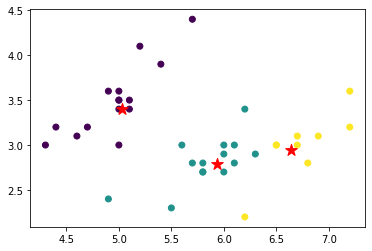

In [78]:
# сам scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')

### 6. Отбросим целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [79]:
data_kmeans = data.iloc[:, [0, 1]]
data_kmeans.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### 7. Подберем оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию

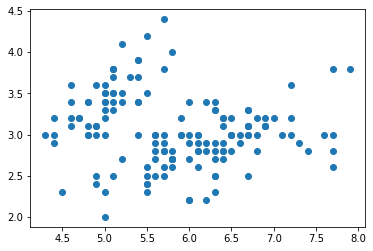

In [80]:
# Посмотрим на данные на графике
plt.scatter(data_kmeans['sepal length (cm)'], data_kmeans['sepal width (cm)'])

Нормализация данных не требуется, т.к. данные находятся в едином масштабе

<b> Алгоритм Kmeans </b>

In [81]:
from sklearn.cluster import KMeans

<b> Укажем 2 кластера: <b>

In [82]:
# Укажем количество кластеров 2
kmeans = KMeans(n_clusters = 2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_kmeans)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

<b> Визуализируем полученную кластеризацию на графике: </b>

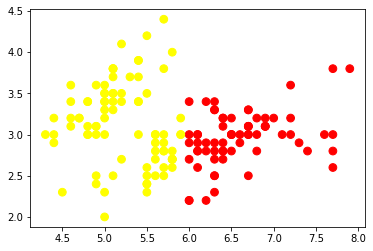

In [83]:
plt.scatter(data_kmeans['sepal length (cm)'], data_kmeans['sepal width (cm)'], cmap='autumn', c=clusters, s=60)

<b> Укажем 3 кластера: </b>

In [84]:
# Укажем количество кластеров 3
kmeans = KMeans(n_clusters = 3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_kmeans)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

<b> Визуализируем полученную кластеризацию на графике </b>

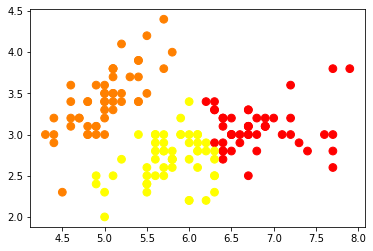

In [85]:
plt.scatter(data_kmeans['sepal length (cm)'], data_kmeans['sepal width (cm)'], cmap='autumn', c=clusters, s=60)

<b> Определим количество кластеров с помощью метода локтя </b>

In [86]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters = k)
    clusters_kmeans = clf_kmeans.fit_predict(data_kmeans)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

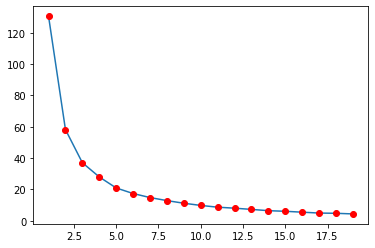

In [87]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

На графике локтя видим, что он становится более пологим после точки 3. Также построив визуализации метода Kmeans для 2х и 3х кластеров видим, что логичнее выделить 3 класса.